<a href="https://colab.research.google.com/github/Althaf0097/Demo/blob/main/Unsupervised_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [33]:
# Load the dataset
file_path = 'fish.csv'
fish_df = pd.read_csv(file_path)

In [34]:
# Step 1: Extract relevant features (e.g., weight and length1)
# Assuming that 'weight' and 'length1' correspond to specific columns. Adjust if column names are different.
features = fish_df[['242.0', '23.2']]  # Replace with 'weight' and 'length1' columns if they have different names

In [35]:
# Step 2: Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [36]:
# Step 3: Find the optimal number of clusters using the Elbow method for KMeans
sse = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

In [37]:
# Perform Agglomerative Hierarchical Clustering with corrected parameter
agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(features_scaled)


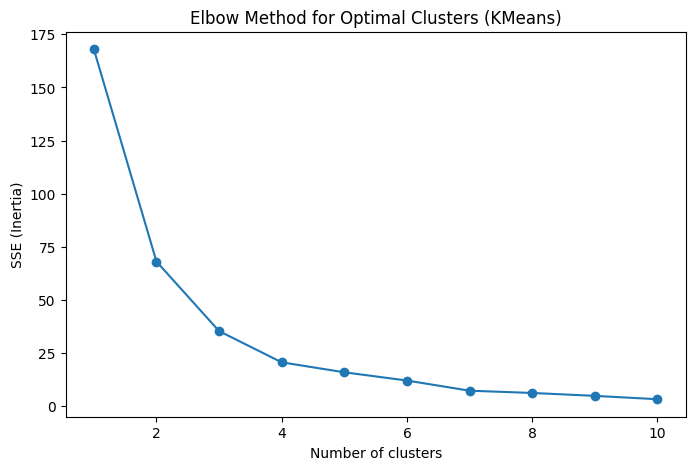

In [38]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method for Optimal Clusters (KMeans)')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.show()


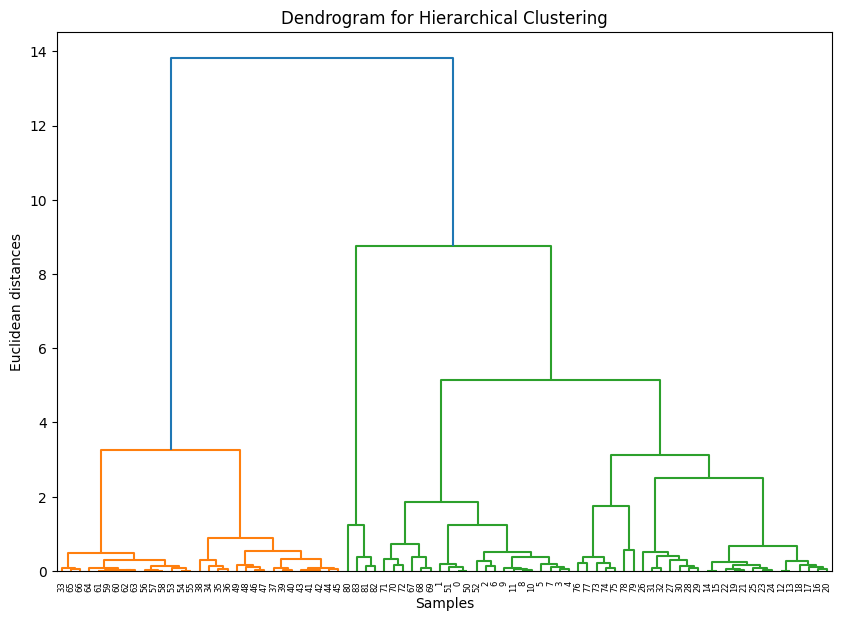

In [39]:
# Step 4: Perform KMeans clustering with the optimal number of clusters (let's assume 3 for example)
optimal_k = 3  # From the elbow plot, adjust this value accordingly
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)

# Step 5: Perform Agglomerative Hierarchical Clustering
# Find the optimal number of clusters using a dendrogram
plt.figure(figsize=(10, 7))
linked = linkage(features_scaled, method='ward')
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


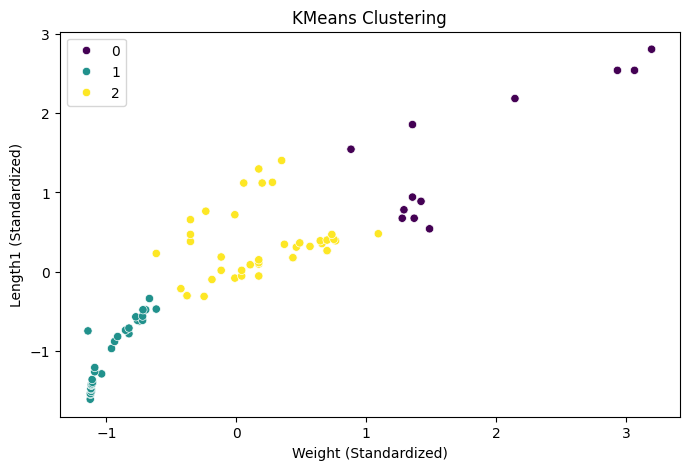

In [40]:
# Step 6: Plot the clusters from KMeans
plt.figure(figsize=(8, 5))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Weight (Standardized)')
plt.ylabel('Length1 (Standardized)')
plt.show()

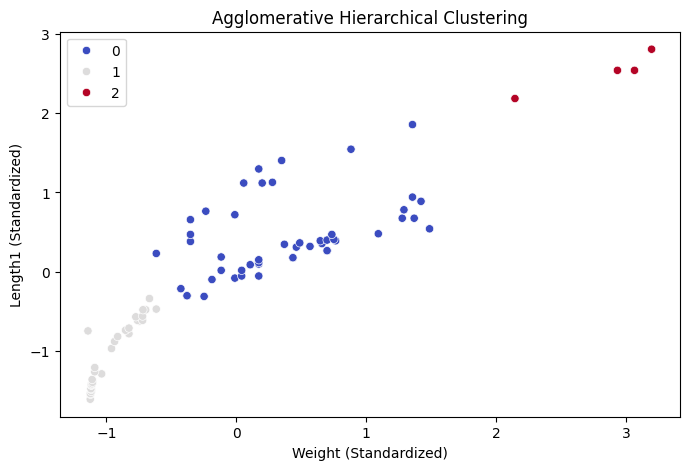

In [41]:
# Step 7: Plot the clusters from Agglomerative Hierarchical Clustering
plt.figure(figsize=(8, 5))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=agg_labels, palette='coolwarm')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Weight (Standardized)')
plt.ylabel('Length1 (Standardized)')
plt.show()